# Netflix Content Analysis Project

This project analyzes Netflix movies and TV shows data to generate insights
that can help Netflix decide what type of content to produce and how to grow
its business in different countries.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For better visuals
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

In [11]:
df = pd.read_csv("netflix.csv")

In [12]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [13]:
df.shape

(8807, 12)

In [14]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

## Dataset Overview

The dataset contains information about movies and TV shows available on Netflix,
including details such as title, type, country, release year, rating, duration,
and genre. This dataset will be used to analyze content trends and generate
business insights for Netflix.

## Problem Statement

Netflix is a global streaming platform offering a wide variety of movies and TV shows.
The objective of this analysis is to explore Netflix’s content dataset to understand
content trends across different countries, content types, and time periods.

The insights generated from this analysis will help Netflix decide:
- What type of content (Movies or TV Shows) to focus on
- Which genres and countries have more content
- How content production has changed over time
- How Netflix can grow its business in different regions

In [15]:
print("Total number of records:", df.shape[0])
print("Total number of features:", df.shape[1])

Total number of records: 8807
Total number of features: 12


In [16]:
df['type'].value_counts()

,count
type,
Movie,6131
TV Show,2676


In [17]:
df['country'].nunique()

748

In [18]:
print("Oldest release year:", df['release_year'].min())
print("Latest release year:", df['release_year'].max())

Oldest release year: 1925
Latest release year: 2021


In [19]:
df['rating'].value_counts().head(10)

,count
rating,
TV-MA,3207
TV-14,2160
TV-PG,863
R,799
PG-13,490
TV-Y7,334
TV-Y,307
PG,287
TV-G,220


## Key Observations from Basic Metrics

- The dataset contains a large number of movies and TV shows available on Netflix.
- Movies constitute a significant portion of the content, but TV shows also form a major share.
- Netflix content spans across multiple countries, indicating a strong global presence.
- The dataset includes content released over several decades, enabling trend analysis over time.
- A wide range of content ratings is observed, catering to different audience groups.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [21]:
df.shape

(8807, 12)

In [22]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [23]:
df.describe(include='object')

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8804,4528,7692,748,1767,17,220,514,8775
top,s8807,Movie,Feb-09,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,2,19,19,2818,109,3207,1793,362,4


In [24]:
df.isnull().sum().sort_values(ascending=False)

,0
director,2634
country,831
cast,825
date_added,10
rating,4
duration,3
show_id,0
type,0
title,0
release_year,0


In [25]:
categorical_cols = ['type', 'rating']

for col in categorical_cols:
    df[col] = df[col].astype('category')

## Data Structure and Quality Observations

- The dataset contains both categorical and numerical attributes.
- Most columns such as type, title, director, country, and listed_in are categorical in nature.
- The release_year column is numerical and will be useful for trend analysis.
- Several columns contain missing values, particularly director, cast, country, and rating.
- No immediate inconsistencies were observed in the dataset structure.

In [26]:
df['type'].value_counts()

,count
type,
Movie,6131
TV Show,2676


In [27]:
df['rating'].value_counts()

,count
rating,
TV-MA,3207
TV-14,2160
TV-PG,863
R,799
PG-13,490
TV-Y7,334
TV-Y,307
PG,287
TV-G,220


In [28]:
df['release_year'].value_counts().head(10)

,count
release_year,
2018,1147
2017,1032
2019,1030
2020,953
2016,902
2021,592
2015,560
2014,352
2013,288


In [29]:
df['country'].value_counts().head(10)

,count
country,
United States,2818
India,972
United Kingdom,419
Japan,245
South Korea,199
Canada,181
Spain,145
France,124
Mexico,110


In [30]:
print("Unique titles:", df['title'].nunique())
print("Unique directors:", df['director'].nunique())
print("Unique countries:", df['country'].nunique())
print("Unique genres:", df['listed_in'].nunique())

Unique titles: 8804
Unique directors: 4528
Unique countries: 748
Unique genres: 514


In [31]:
df['listed_in'].value_counts().head(10)

,count
listed_in,
"Dramas, International Movies",362
Documentaries,359
Stand-Up Comedy,334
"Comedies, Dramas, International Movies",274
"Dramas, Independent Movies, International Movies",252
Kids' TV,220
Children & Family Movies,215
"Children & Family Movies, Comedies",201
"Documentaries, International Movies",186


## Non-Graphical Analysis Observations

- Movies are more prevalent than TV shows in the dataset, although TV shows form a significant portion.
- A few content ratings dominate the platform, indicating Netflix’s focus on specific audience segments.
- Content production has increased significantly in recent years.
- The United States contributes the highest number of titles, followed by other major countries.
- Netflix hosts content across a wide range of genres, indicating strong content diversity.

In [32]:
df_processed = df.copy()

In [33]:
df_processed['country'] = df_processed['country'].fillna('Unknown')
df_processed['country'] = df_processed['country'].str.split(',')
df_processed = df_processed.explode('country')
df_processed['country'] = df_processed['country'].str.strip()

In [34]:
df_processed['listed_in'] = df_processed['listed_in'].str.split(',')
df_processed = df_processed.explode('listed_in')
df_processed['listed_in'] = df_processed['listed_in'].str.strip()

In [35]:
df_cast = df[['cast']].dropna()
df_cast['cast'] = df_cast['cast'].str.split(',')
df_cast = df_cast.explode('cast')
df_cast['cast'] = df_cast['cast'].str.strip()

In [36]:
df_director = df[['director']].dropna()
df_director['director'] = df_director['director'].str.split(',')
df_director = df_director.explode('director')
df_director['director'] = df_director['director'].str.strip()

In [37]:
df_processed.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,Crime TV Shows,To protect his family from a powerful drug lor...


In [38]:
df_processed.shape

(23764, 12)

## Data Pre-Processing

Certain columns such as country, listed_in (genre), cast, and director contain
multiple values within a single cell. To ensure accurate analysis and visualization,
these columns were split and unnested using the explode operation.

This preprocessing step allows each country, genre, actor, and director to be
analyzed independently without data distortion.

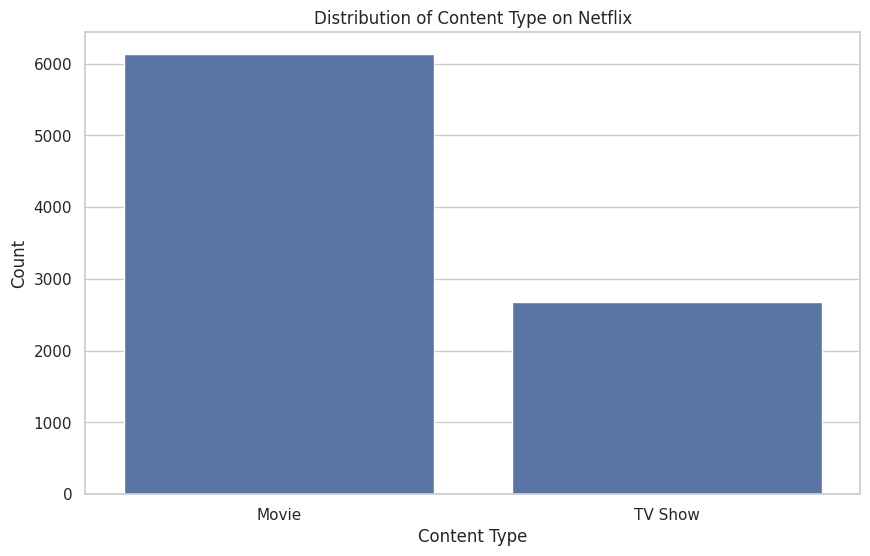

In [39]:
sns.countplot(data=df, x='type')
plt.title("Distribution of Content Type on Netflix")
plt.xlabel("Content Type")
plt.ylabel("Count")
plt.show()

### Observation:
Movies are more prevalent than TV Shows on Netflix, indicating that movies form a
significant portion of Netflix’s content library.

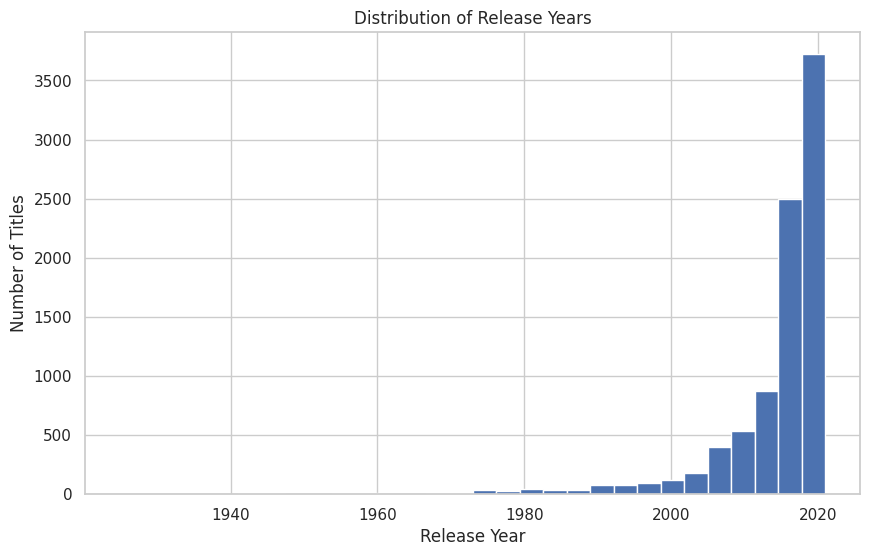

In [40]:
plt.hist(df['release_year'], bins=30)
plt.title("Distribution of Release Years")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.show()

### Observation:
The number of titles released has increased significantly in recent years,
indicating Netflix’s rapid content expansion.

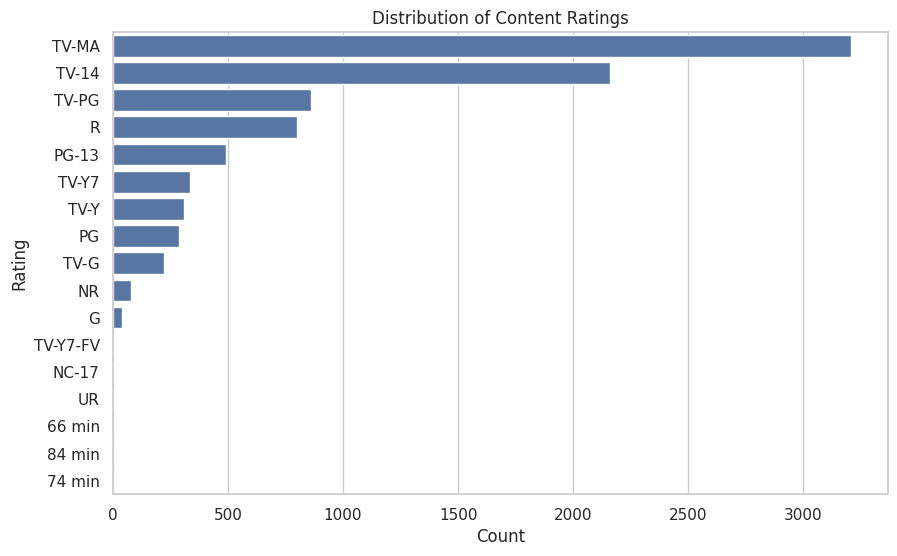

In [41]:
sns.countplot(
    data=df,
    y='rating',
    order=df['rating'].value_counts().index
)
plt.title("Distribution of Content Ratings")
plt.xlabel("Count")
plt.ylabel("Rating")
plt.show()

### Observation:
Most Netflix content falls under TV-MA and TV-14 ratings, suggesting a strong focus
on mature and young adult audiences.

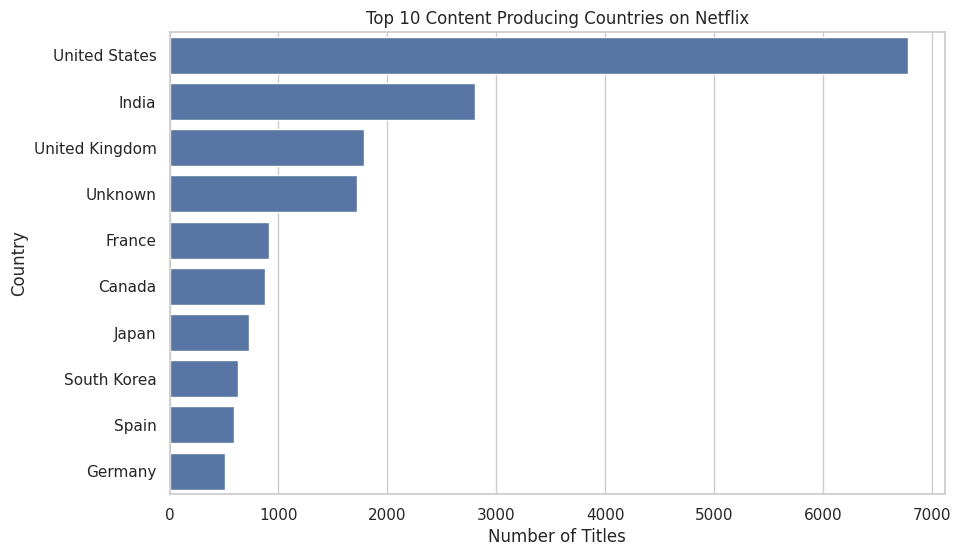

In [42]:
top_countries = df_processed['country'].value_counts().head(10)

sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title("Top 10 Content Producing Countries on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()

### Observation:
The United States contributes the highest number of titles on Netflix, followed by
countries such as India and the United Kingdom, highlighting Netflix’s strong
presence in these regions.


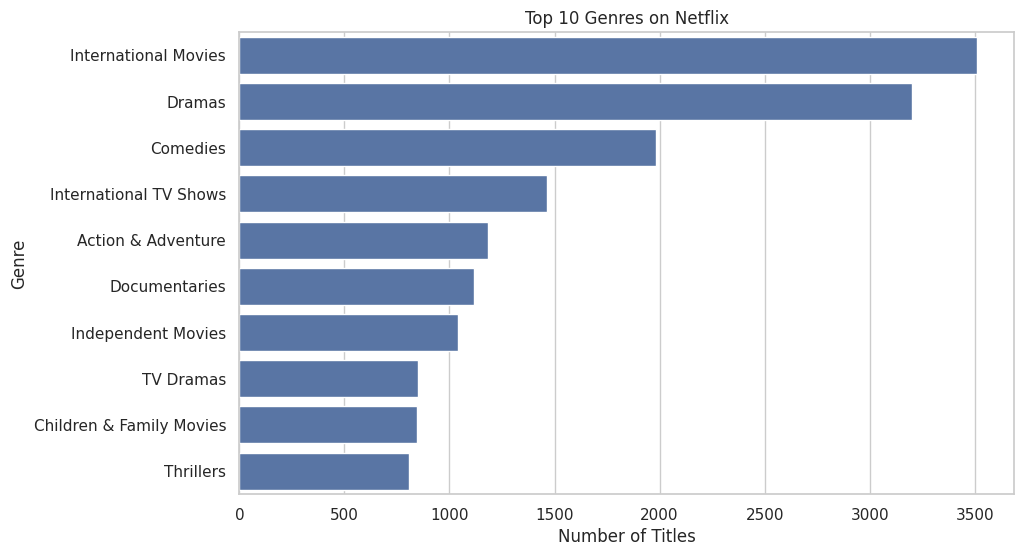

In [43]:
top_genres = df_processed['listed_in'].value_counts().head(10)

sns.barplot(x=top_genres.values, y=top_genres.index)
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.show()

### Observation:
Drama and International Movies are among the most common genres on Netflix,
indicating a strong preference for diverse and narrative-driven content.


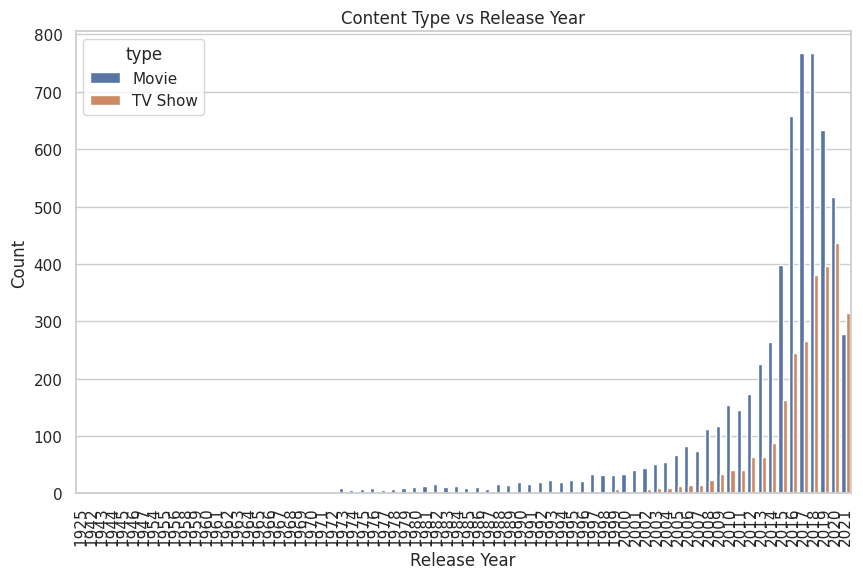

In [44]:
sns.countplot(data=df, x='release_year', hue='type')
plt.title("Content Type vs Release Year")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

### Observation:
In recent years, the number of TV shows released has increased compared to movies,
indicating Netflix’s growing focus on episodic content.

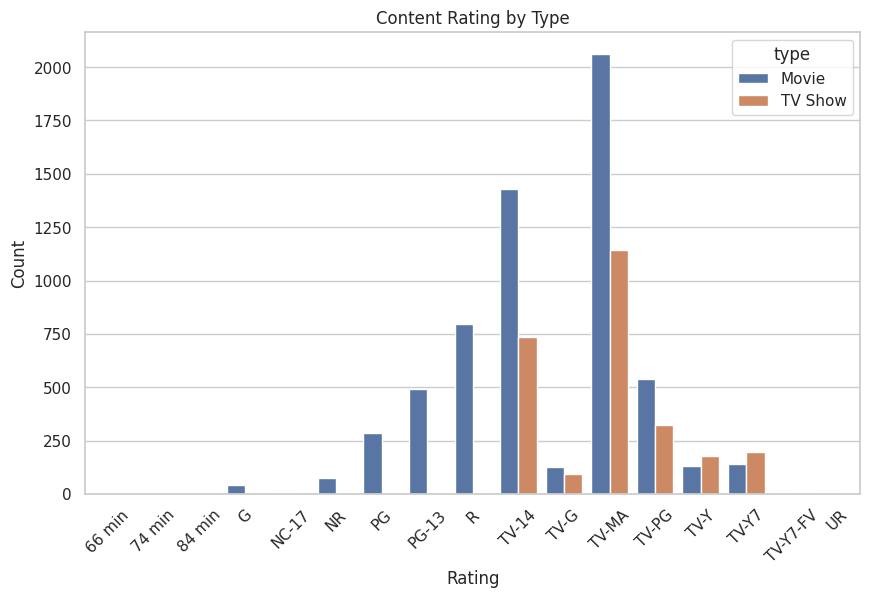

In [45]:
sns.countplot(data=df, x='rating', hue='type')
plt.title("Content Rating by Type")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

### Observation:
TV shows are more prevalent in mature content ratings such as TV-MA, while movies
are distributed across a wider range of ratings.

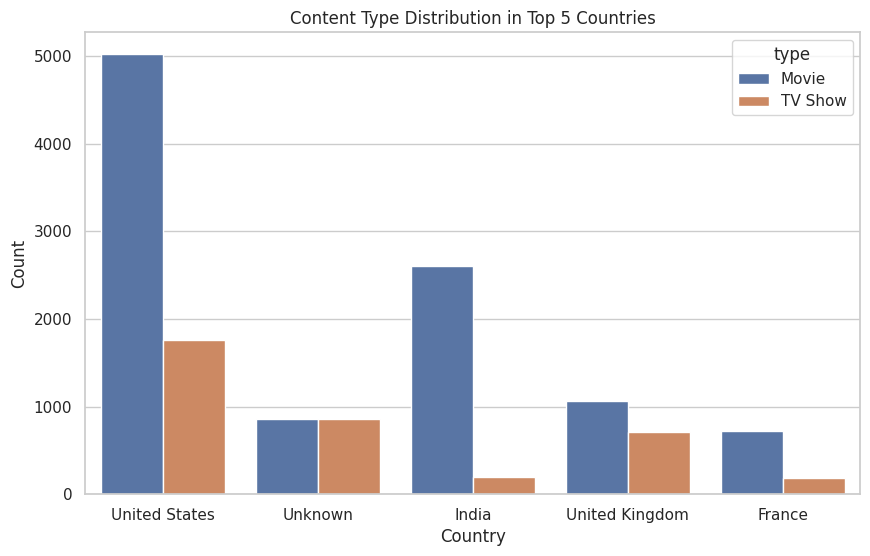

In [46]:
top_5_countries = df_processed['country'].value_counts().head(5).index

country_type_data = df_processed[df_processed['country'].isin(top_5_countries)]

sns.countplot(
    data=country_type_data,
    x='country',
    hue='type'
)
plt.title("Content Type Distribution in Top 5 Countries")
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()

### Observation:
The United States and India produce a large number of movies, while certain
countries show a growing trend toward TV show production.

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-300814701.py:2: SyntaxWarning: invalid escape sequence '\d'
  df_duration['duration_value'] = df_duration['duration'].str.extract('(\d+)').astype(float)


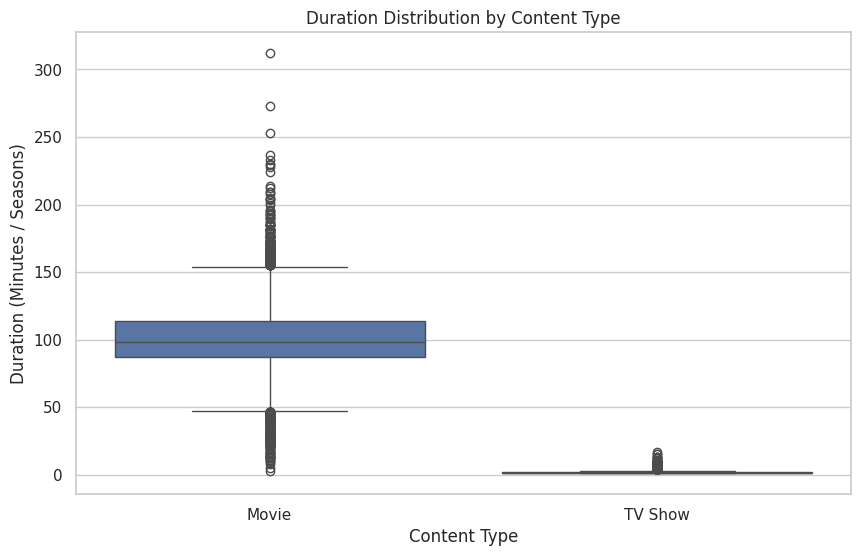

In [47]:
df_duration = df.copy()
df_duration['duration_value'] = df_duration['duration'].str.extract('(\d+)').astype(float)

sns.boxplot(data=df_duration, x='type', y='duration_value')
plt.title("Duration Distribution by Content Type")
plt.xlabel("Content Type")
plt.ylabel("Duration (Minutes / Seasons)")
plt.show()

### Observation:
Movies generally have higher duration values compared to TV shows, while TV shows
are spread across multiple seasons.

In [48]:
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_values

,0
director,2634
country,831
cast,825
date_added,10
rating,4
duration,3
show_id,0
type,0
title,0
release_year,0


In [49]:
(missing_values / len(df)) * 100

,0
director,29.908028
country,9.435676
cast,9.367549
date_added,0.113546
rating,0.045418
duration,0.034064
show_id,0.000000
type,0.000000
title,0.000000
release_year,0.000000


In [56]:
df['rating'] = df['rating'].astype('object')
df['rating'] = df['rating'].fillna('Not Rated')

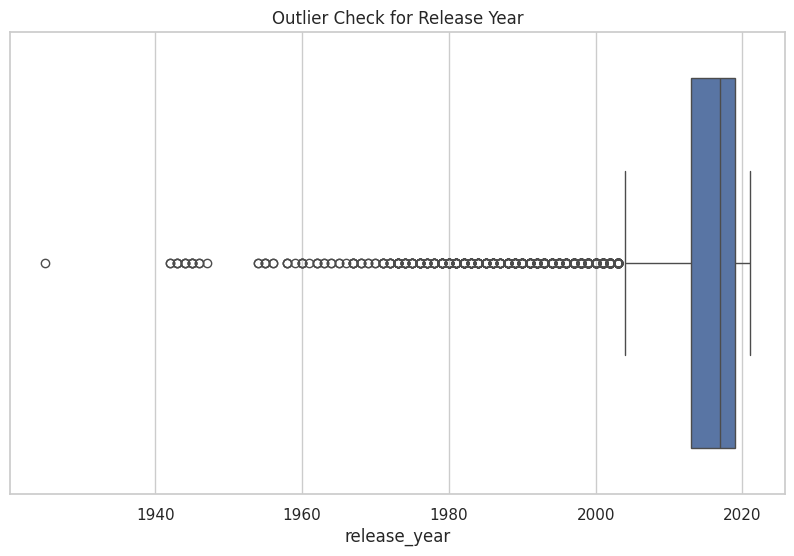

In [57]:
sns.boxplot(x=df['release_year'])
plt.title("Outlier Check for Release Year")
plt.show()

## Missing Values and Outlier Analysis

Several columns such as director, cast, country, and rating contain missing values.
Missing values in the country and rating columns were handled by replacing them
with 'Unknown' and 'Not Rated' respectively, as these fields are important for
categorical analysis.

The release_year column was checked for outliers using a boxplot. Although a few
older years appear as outliers, these represent valid historical data and were
retained without treatment.


## Insights from Data Analysis

1. Netflix’s content library is dominated by movies, although the number of TV shows
   has increased significantly in recent years.

2. The United States is the largest contributor of Netflix content, followed by
   countries such as India and the United Kingdom, indicating strong content
   production in these regions.

3. Netflix has shown rapid growth in content additions after 2015, highlighting
   increased investment in original and licensed content.

4. Mature content ratings such as TV-MA and TV-14 dominate the platform, suggesting
   a focus on adult and young adult audiences.

5. Drama and International Movies are among the most common genres, reflecting
   Netflix’s emphasis on storytelling and global content.

6. TV shows have gained popularity in recent years compared to movies, indicating
   a strategic shift toward episodic content.

## Business Recommendations

1. Netflix should continue increasing investment in TV shows, as recent trends show
   growing demand for episodic content.

2. The company should focus on expanding content production in high-performing
   regions such as the United States and India, while also exploring emerging
   markets.

3. Netflix can benefit from producing more content in popular genres such as Drama
   and International Movies to cater to diverse audiences.

4. Given the dominance of mature content ratings, Netflix should maintain a balance
   between adult content and family-friendly content to reach wider audiences.

5. Strategic content launches during recent growth years can help Netflix maximize
   viewer engagement and subscription growth.

## Conclusion

This analysis explored Netflix’s content library to identify trends across content
type, country, genre, rating, and release year. The findings indicate Netflix’s
growing focus on TV shows, strong content presence in key markets such as the United
States and India, and a preference for mature and international content.

These insights can help Netflix make informed decisions on future content
production and regional expansion strategies.
